# Part 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy import stats

In [2]:
#!pip install autoviz

In [3]:
#from autoviz.AutoViz_Class import AutoViz_Class
#AV = AutoViz_Class()

In [4]:
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#utilized Autoviz to analyze data quality
#sep = ',' 
#dft = AV.AutoViz(filename="",sep=sep, depVar='SalePrice', dfte=df, header=0, verbose=1,
                 #lowess=False, chart_format='bokeh', max_rows_analyzed=1460, max_cols_analyzed=81)

| Feature | Data Quality Issue | Potential Handling Strategies |
| --- | --- | --- |
| Alley | Missing values > 60% | Delete Column |
| MiscFeature | Missing values > 60% | Delete Column |
| Fence | Missing values > 60% | Delete Column | 
| Fireplace Qu | Missing values > 25% | Replace Values or Delete Column |
| Lot Frontage | Missing values > 25% | Replace Values or Delete Column |
| Sale Price | Skewed right, many outliers | get rid of outliers |
| GrLivArea | Many outliers | Delete Outliers |
|TotalBsmtSF | Not all houses have basements | Delete Column |
| MasVnrArea | Heavily skewed right | Delete Outlier or Delete Column |

In [6]:
#correlation with continuous variables
vars = ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
                       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
                       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
                       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
                       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
for x in vars:
    print(df['SalePrice'].corr(df[x]), x)

-0.02191671944343109 Id
-0.08428413512659519 MSSubClass
0.3517990965706778 LotFrontage
0.26384335387140556 LotArea
0.7909816005838051 OverallQual
-0.07785589404867799 OverallCond
0.5228973328794969 YearBuilt
0.5071009671113862 YearRemodAdd
0.4774930470957156 MasVnrArea
0.3864198062421531 BsmtFinSF1
-0.011378121450215146 BsmtFinSF2
0.2144791055469689 BsmtUnfSF
0.6135805515591956 TotalBsmtSF
0.6058521846919145 1stFlrSF
0.3193338028320678 2ndFlrSF
-0.02560613000067955 LowQualFinSF
0.708624477612652 GrLivArea
0.22712223313149424 BsmtFullBath
-0.016844154297359002 BsmtHalfBath
0.560663762748446 FullBath
0.2841076755947825 HalfBath
0.16821315430074 BedroomAbvGr
-0.1359073708421412 KitchenAbvGr
0.5337231555820282 TotRmsAbvGrd
0.4669288367515276 Fireplaces
0.48636167748786086 GarageYrBlt
0.6404091972583521 GarageCars
0.623431438918362 GarageArea
0.32441344456813 WoodDeckSF
0.3158562271160553 OpenPorchSF
-0.12857795792595678 EnclosedPorch
0.044583665335748396 3SsnPorch
0.1114465711429112 Screen

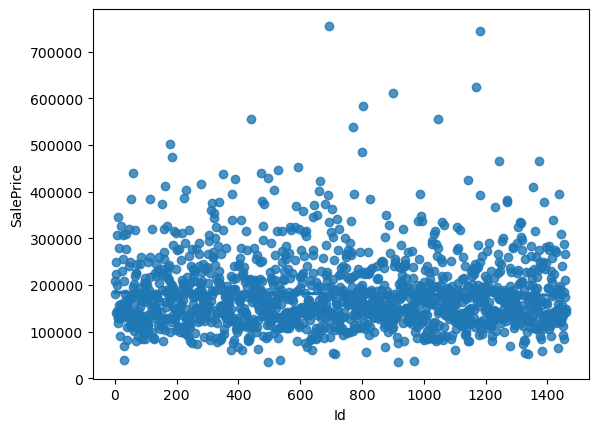

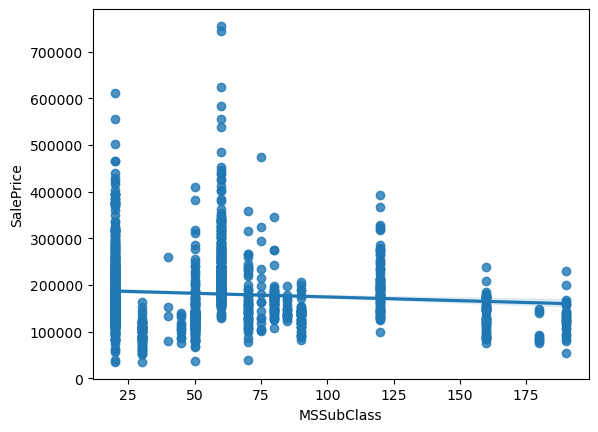

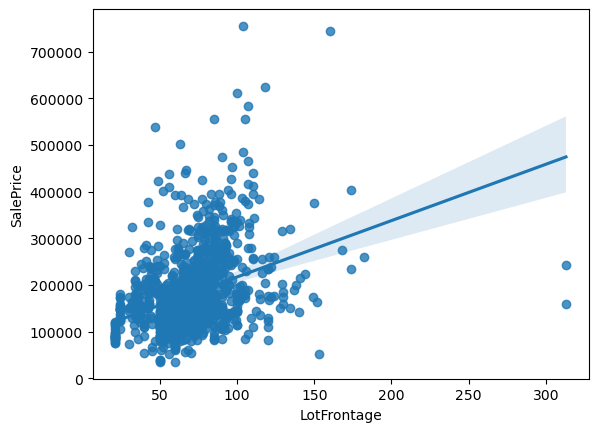

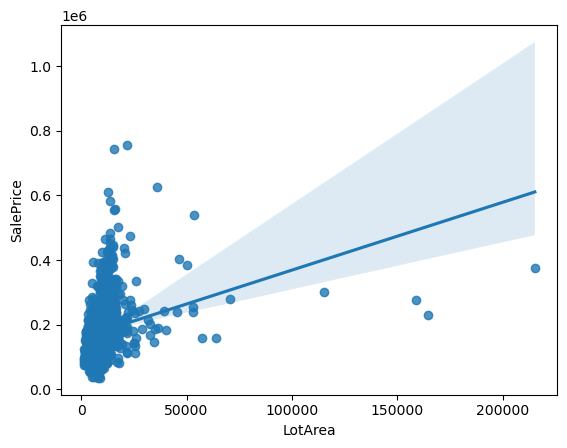

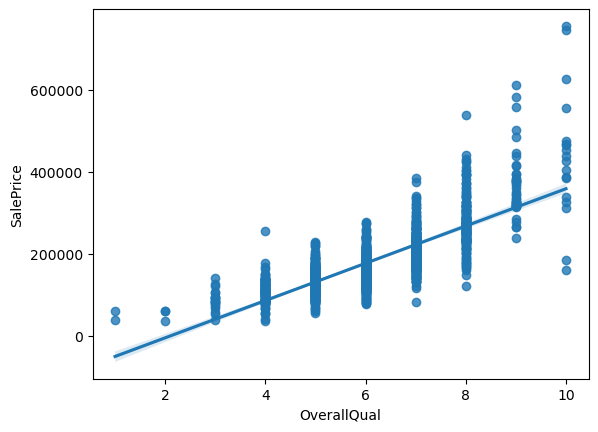

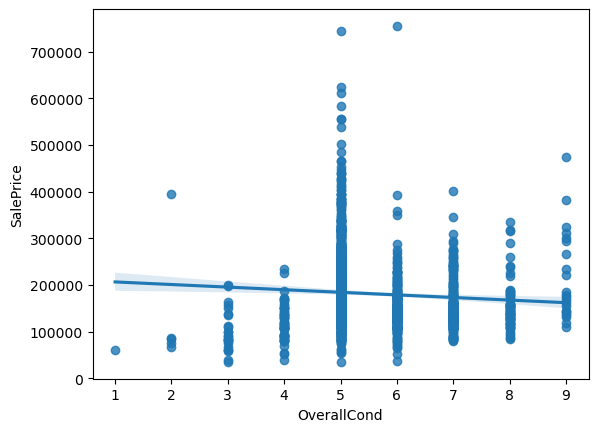

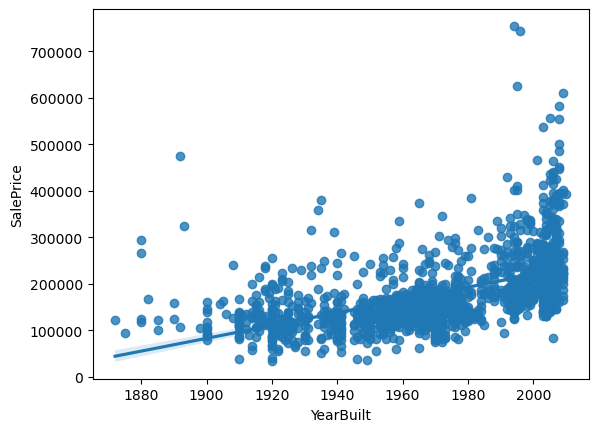

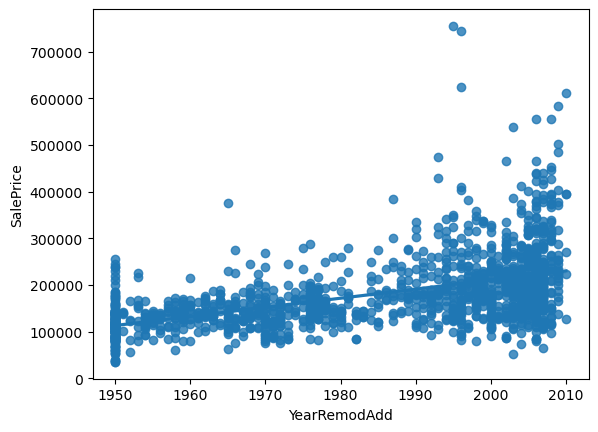

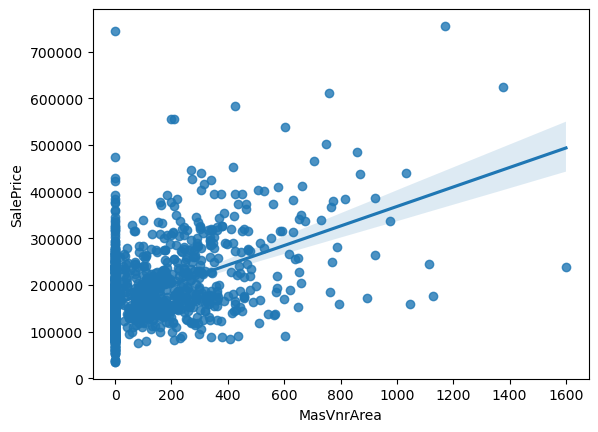

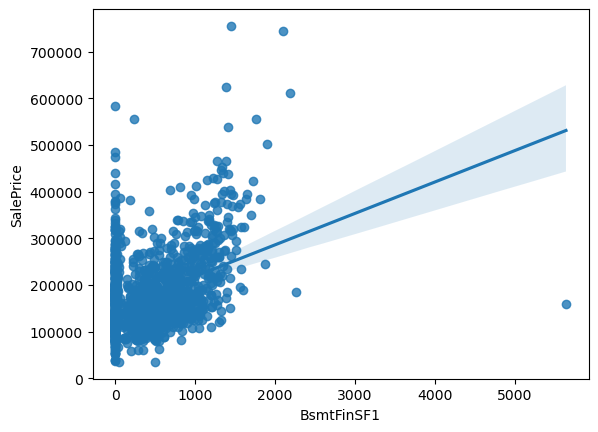

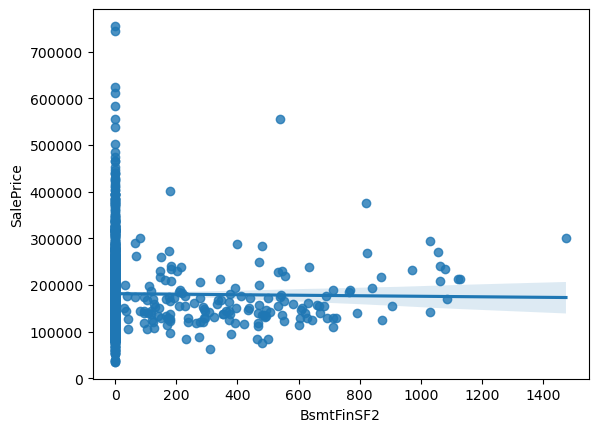

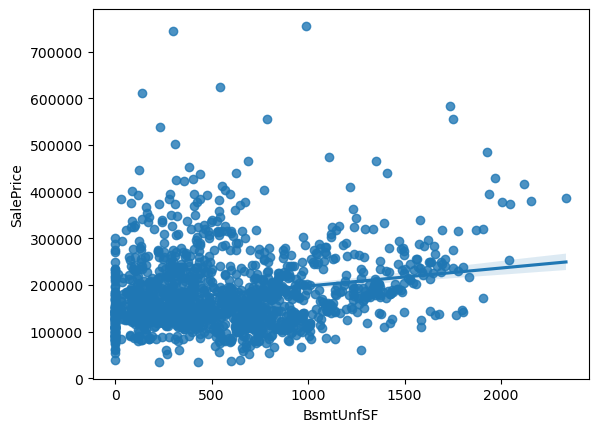

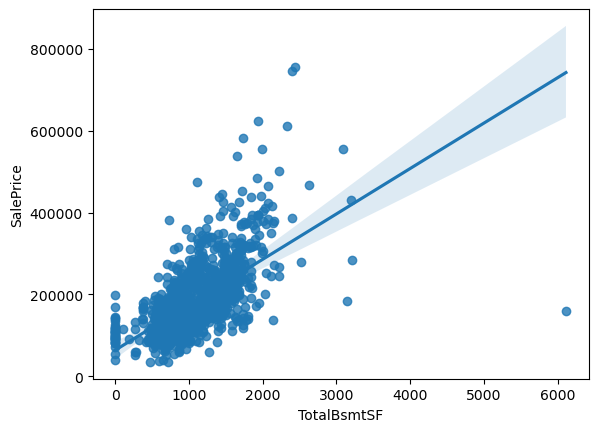

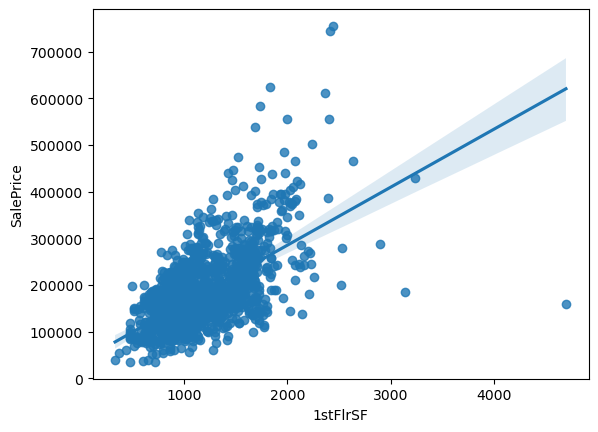

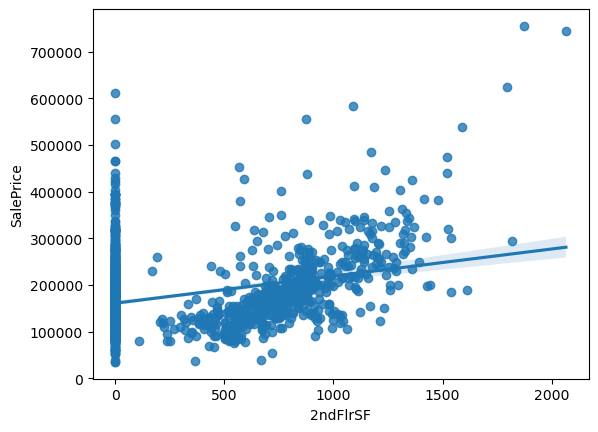

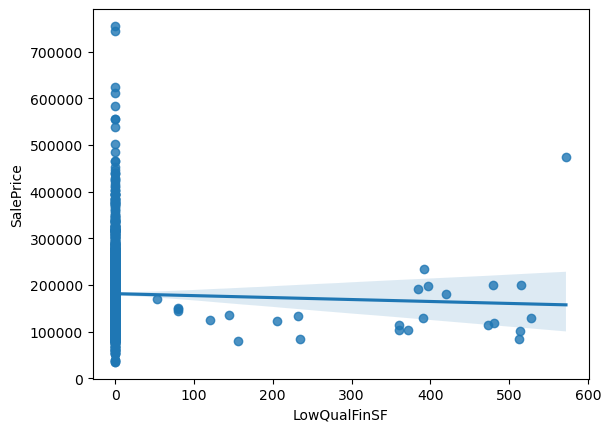

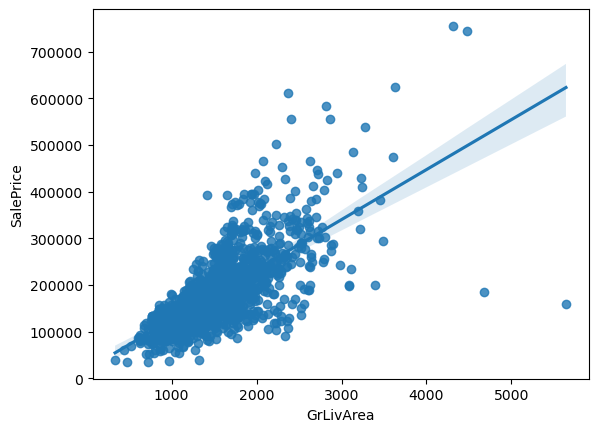

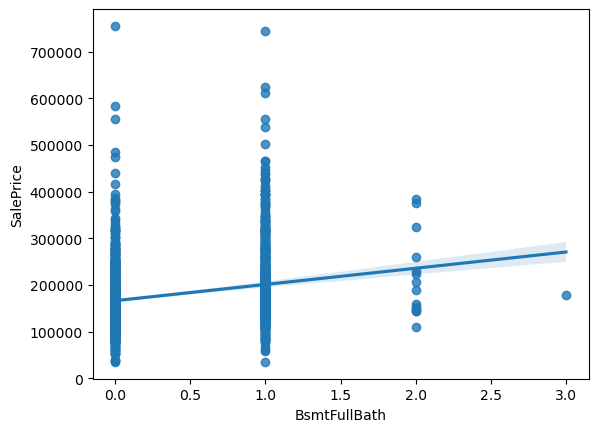

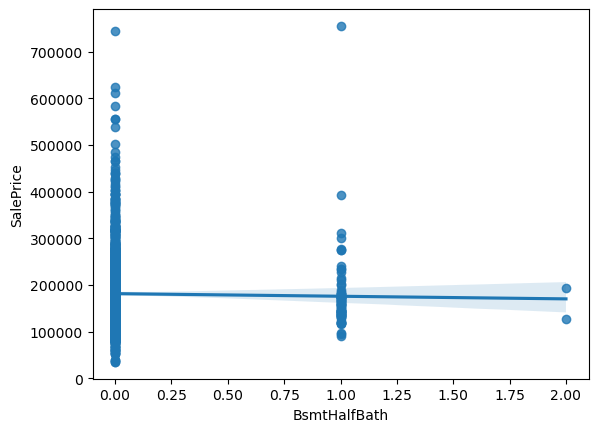

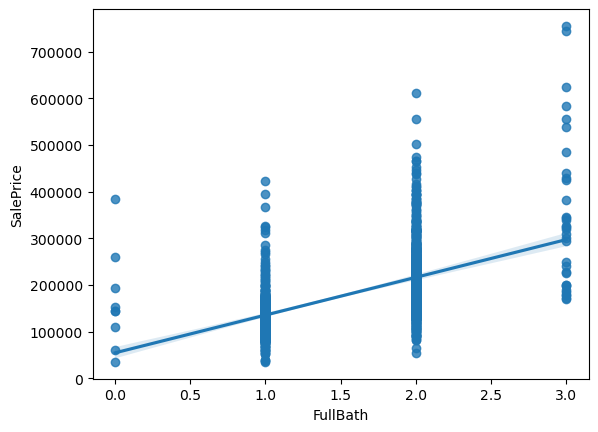

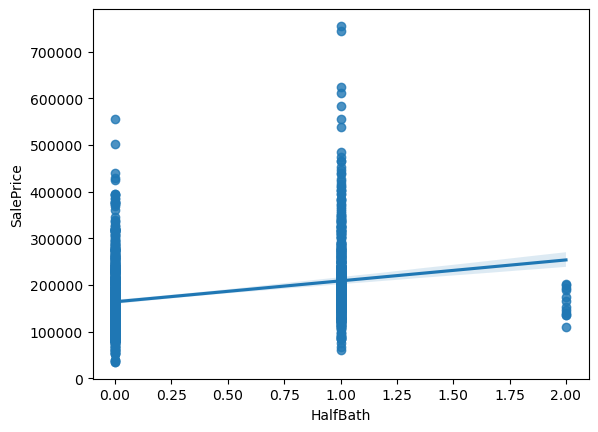

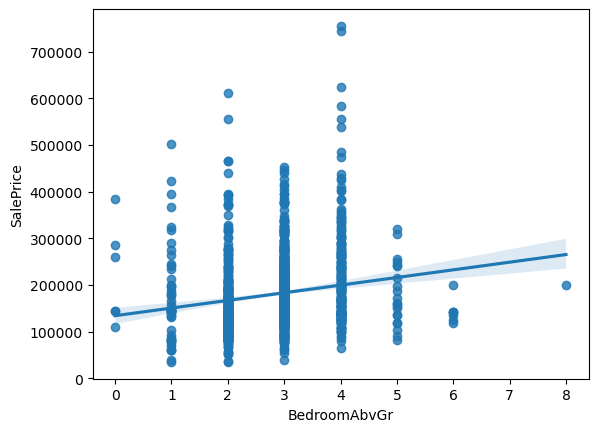

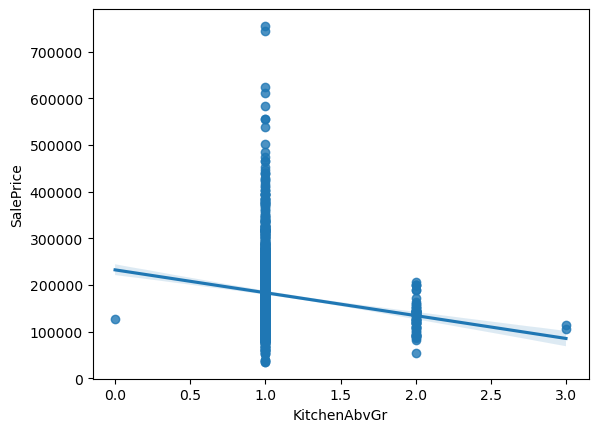

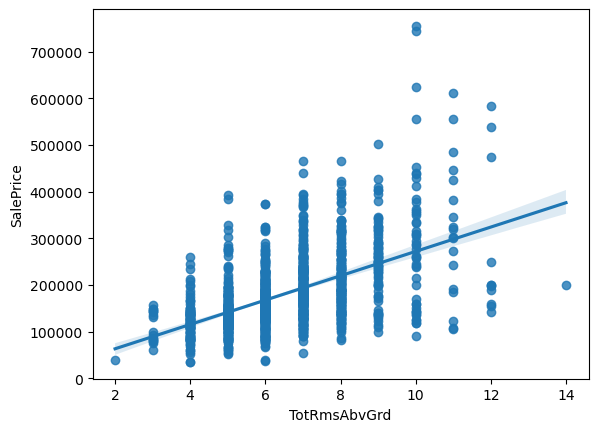

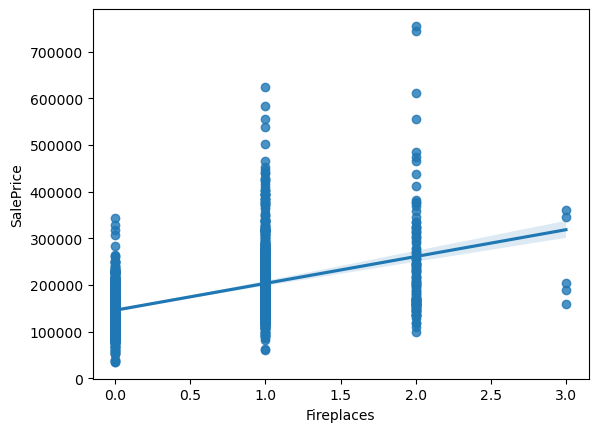

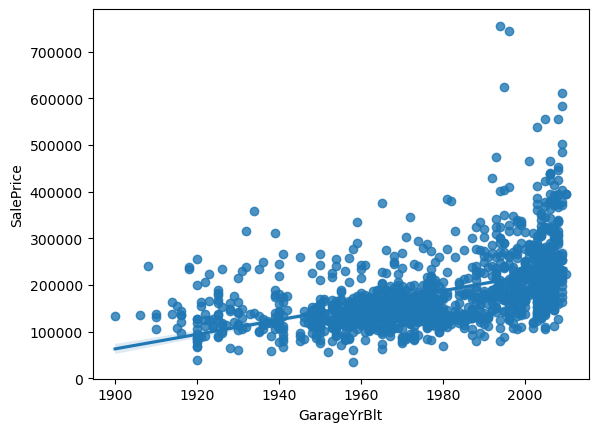

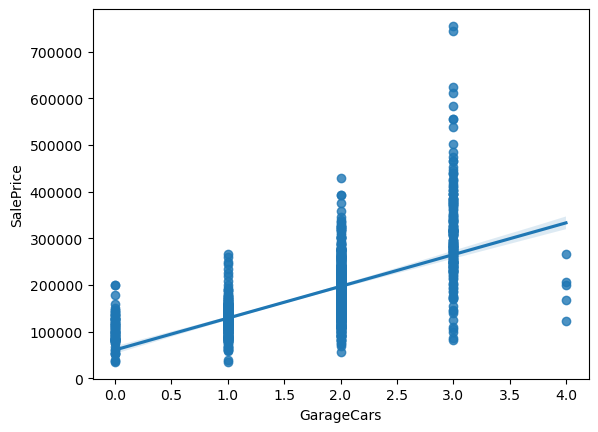

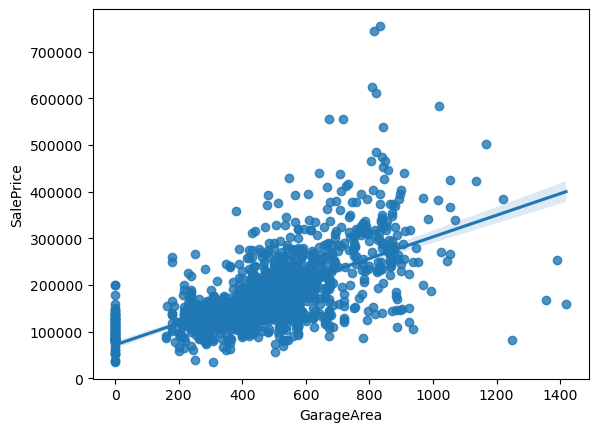

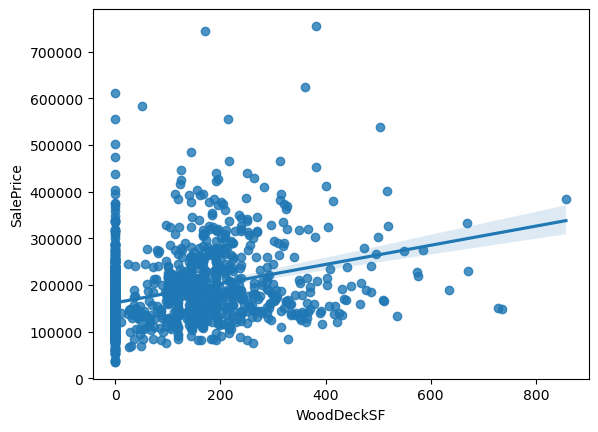

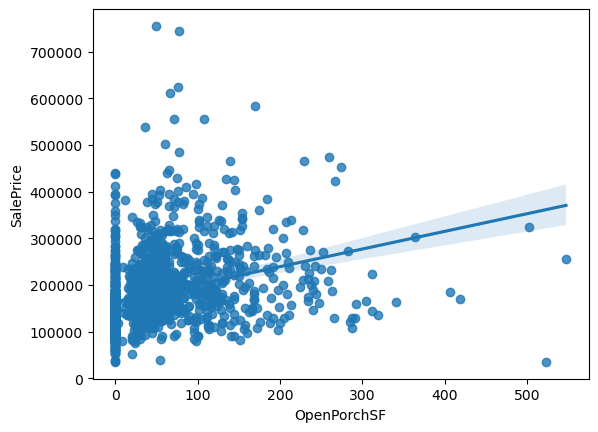

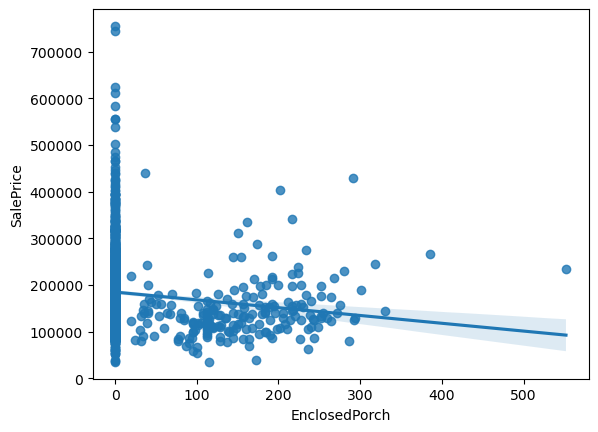

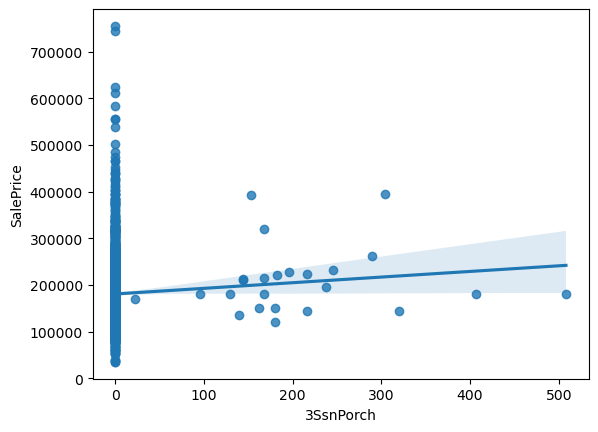

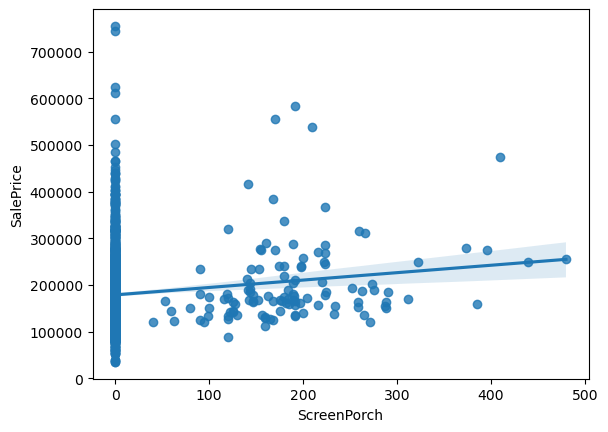

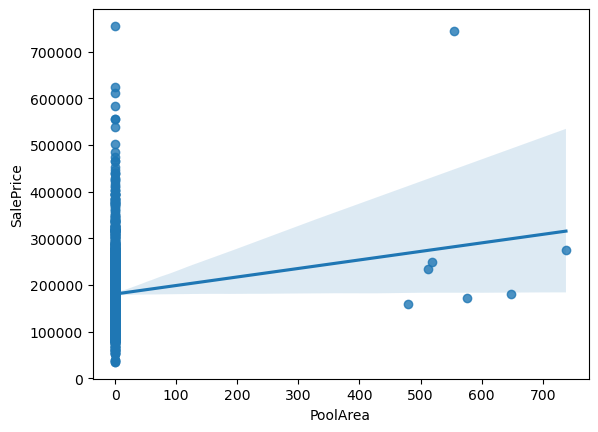

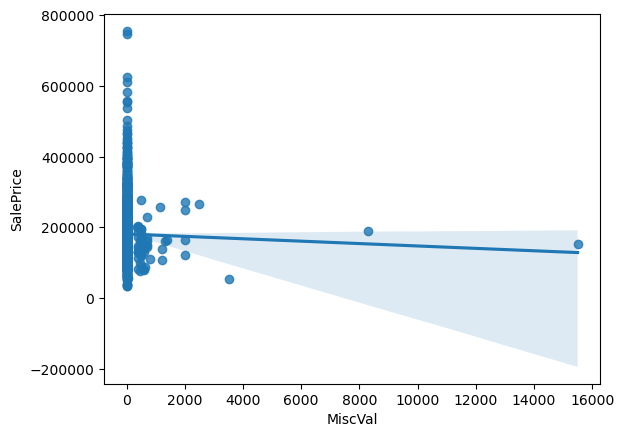

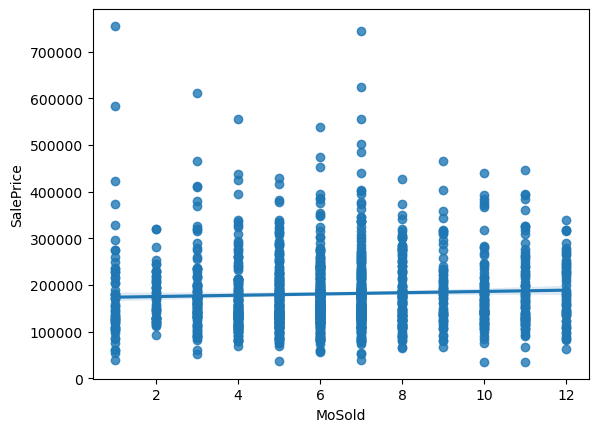

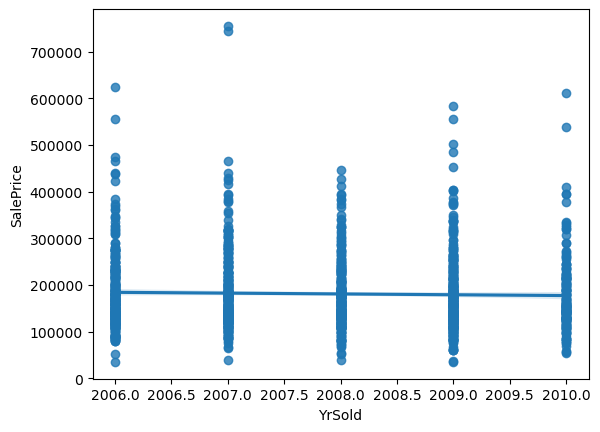

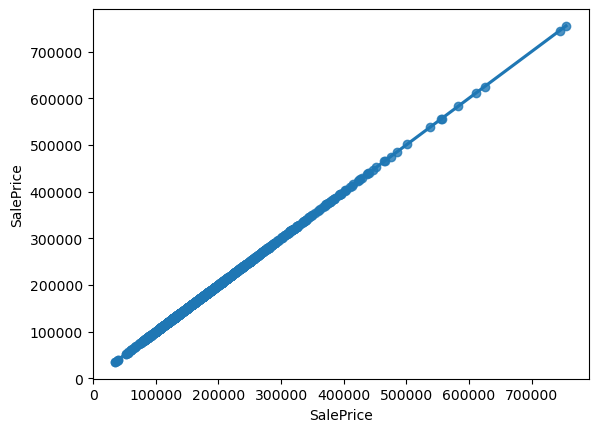

In [7]:
for z in vars:
    sns.regplot(y='SalePrice', x=z, data=df)
    plt.show()

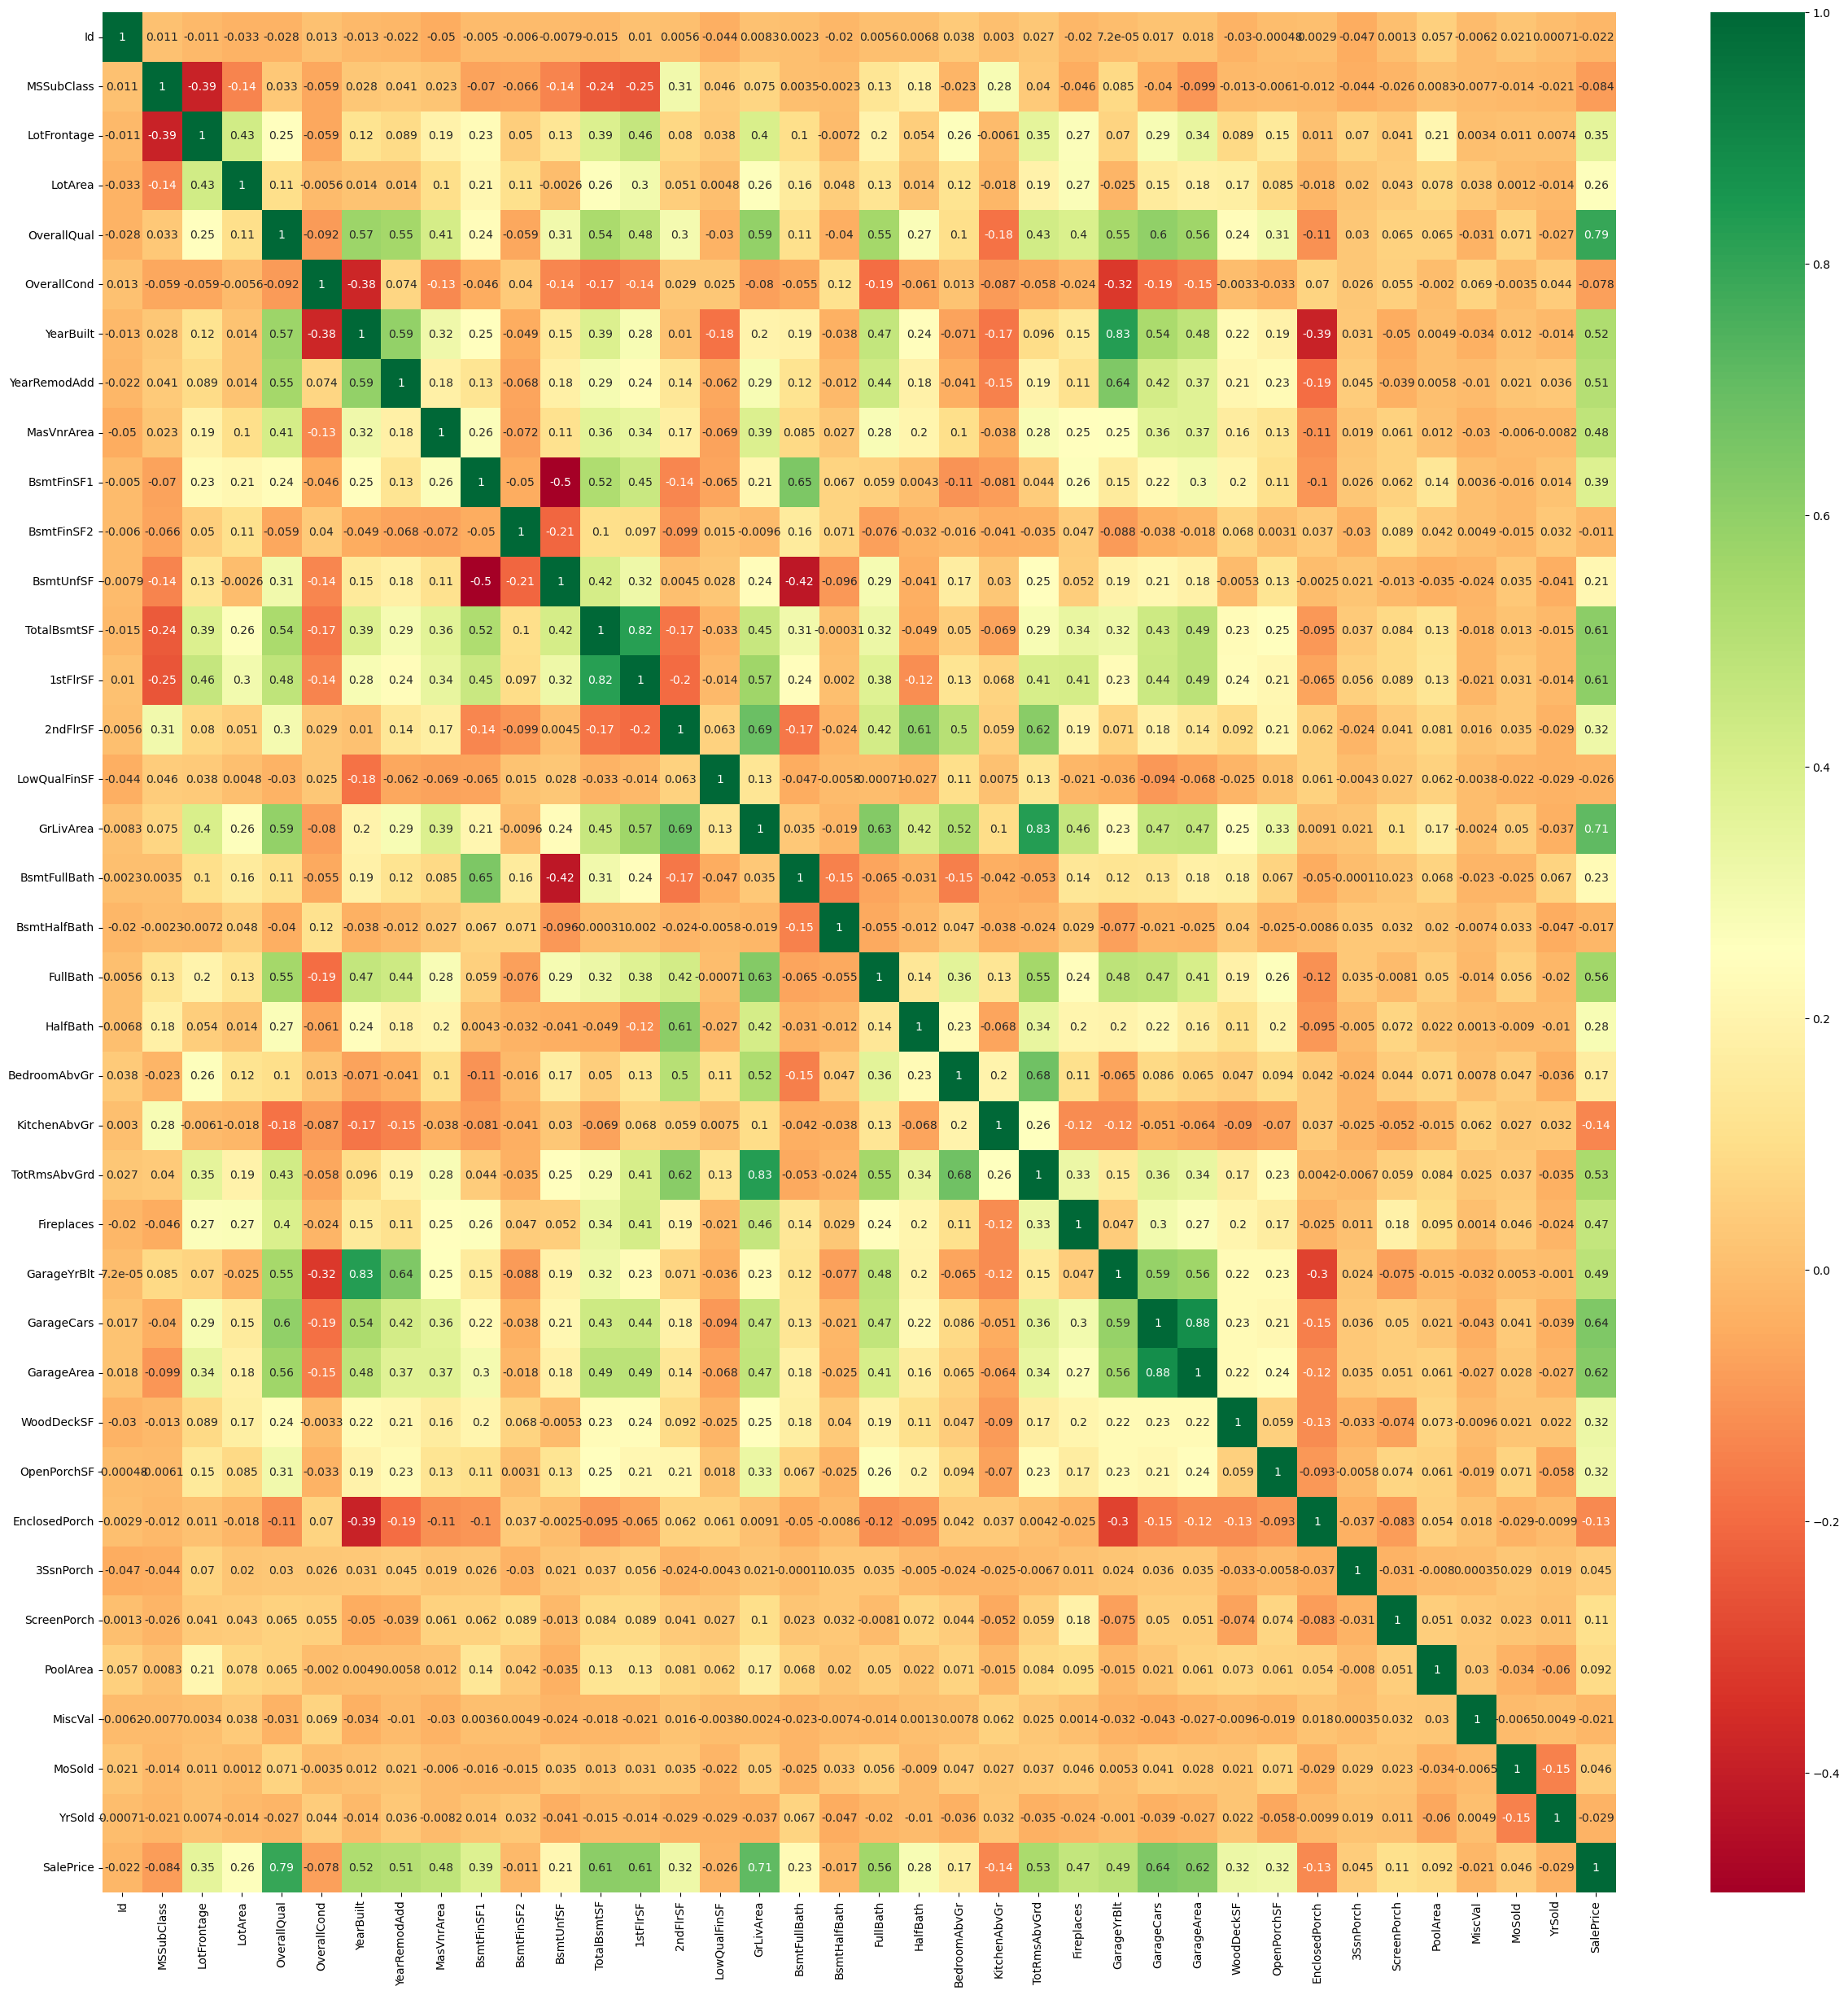

In [8]:
df2=df[vars]
plt.figure(figsize=(30, 30))
sns.heatmap(df2.corr(), cmap='RdYlGn', annot=True)
plt.show()

    #OverallQual, GrLiveArea, GarageCars

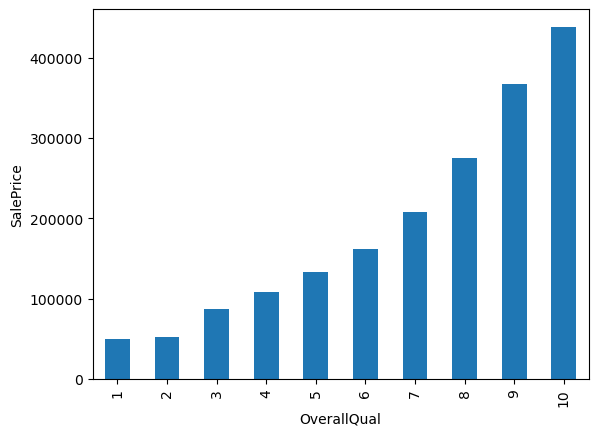

In [9]:
df_grouped = df.groupby('OverallQual')
df_grouped = df_grouped['SalePrice'].mean()
df_grouped.plot(kind='bar')
plt.ylabel('SalePrice')
plt.show()

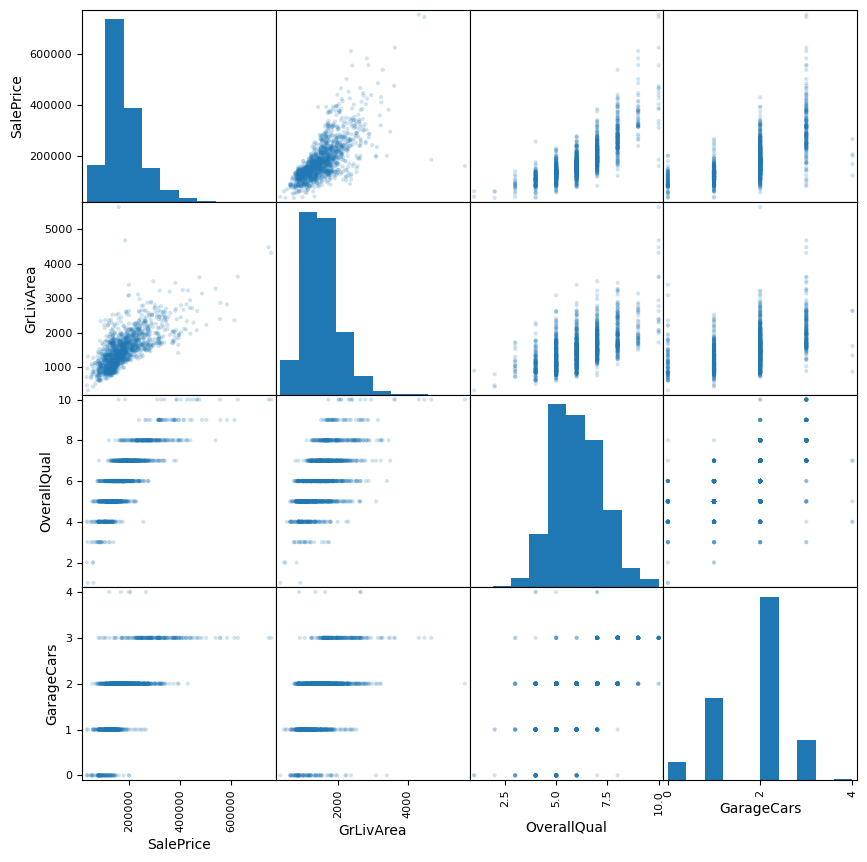

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[['SalePrice', 'GrLivArea', 'OverallQual', 'GarageCars']], alpha=0.2, figsize=(10, 10))
plt.show()

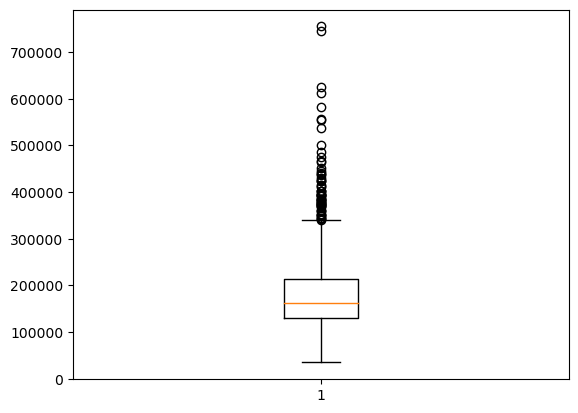

In [11]:
plt.boxplot(df.SalePrice)
plt.show()

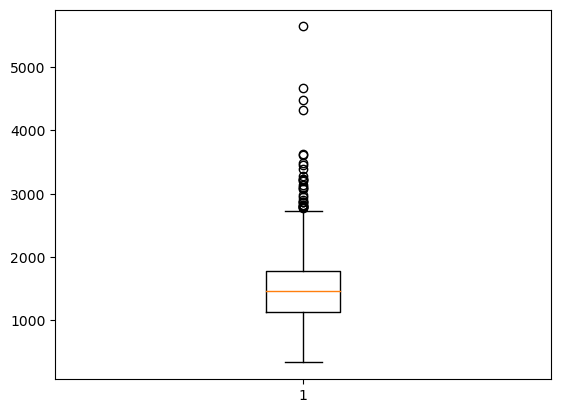

In [12]:
plt.boxplot(df.GrLivArea)
plt.show()

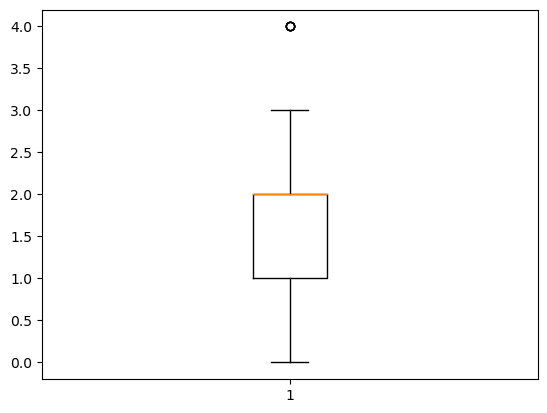

In [13]:
plt.boxplot(df.GarageCars)
plt.show()

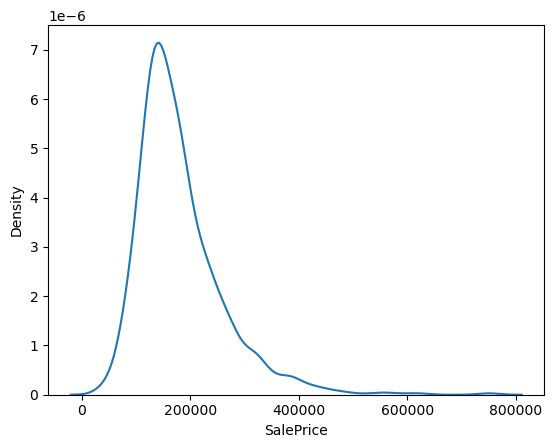

In [14]:
sns.kdeplot(df.SalePrice)
plt.show()

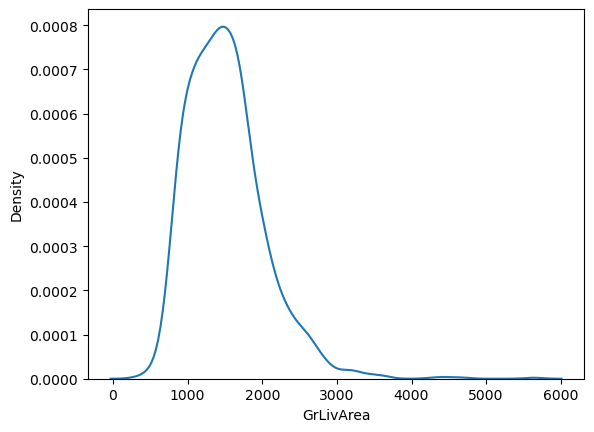

In [15]:
sns.kdeplot(df.GrLivArea)
plt.show()

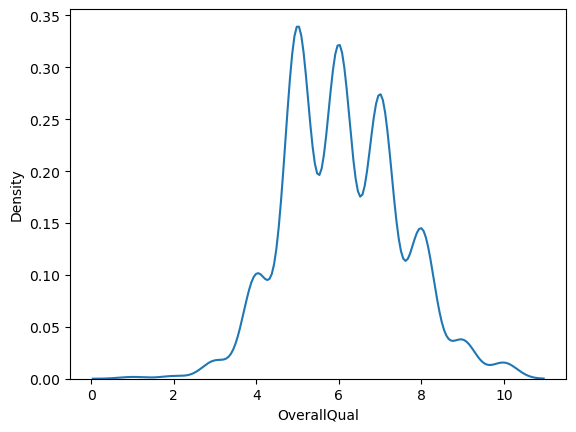

In [16]:
sns.kdeplot(df.OverallQual)
plt.show()

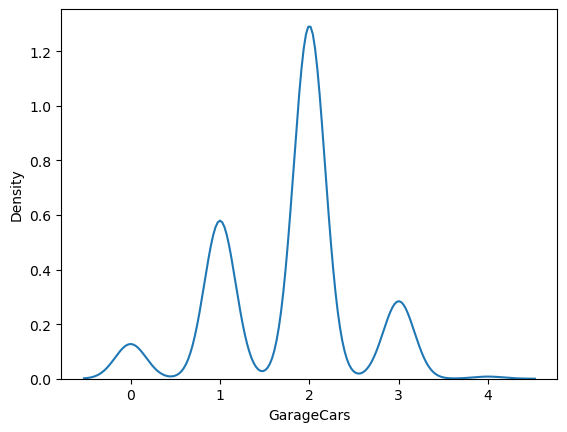

In [17]:
sns.kdeplot(df.GarageCars)
plt.show()

# Part 2

In [18]:
numeric = df.select_dtypes(include=np.number)
numeric_columns = numeric.columns
df[numeric_columns] = df[numeric_columns].fillna(df.mean())

/var/folders/hw/p6lyjkp15mng49_2nrp8g31m0000gn/T/ipykernel_84979/1042495443.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[numeric_columns] = df[numeric_columns].fillna(df.mean())


In [19]:
df.dropna(thresh=0.6*len(df),axis=1,inplace=True)

In [20]:
df.isna().sum()/len(df)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 76, dtype: float64

In [21]:
#calculate z scores
df['zscore_SalesPrice'] = zscore(df['SalePrice'])
df['zscore_GrLivArea'] = zscore(df['GrLivArea'])
df['zscore_GarageCars'] = zscore(df['GarageCars'])

In [22]:
#outliers for Sale Price 
threshold = 2
df['outliers_SalePrice'] = np.where((df.zscore_SalesPrice - threshold > 0), True, np.where(df.zscore_SalesPrice + threshold < 0, True, False))
#outliers for GrLivArea
df['outliers_GrLivArea'] = np.where((df.zscore_GrLivArea - threshold > 0), True, np.where(df.zscore_GrLivArea + threshold < 0, True, False))
#Outliers for LotArea
df['outliers_GarageCars'] = np.where((df.zscore_GarageCars - threshold > 0), True, np.where(df.zscore_GarageCars + threshold < 0, True, False))

# Part 3

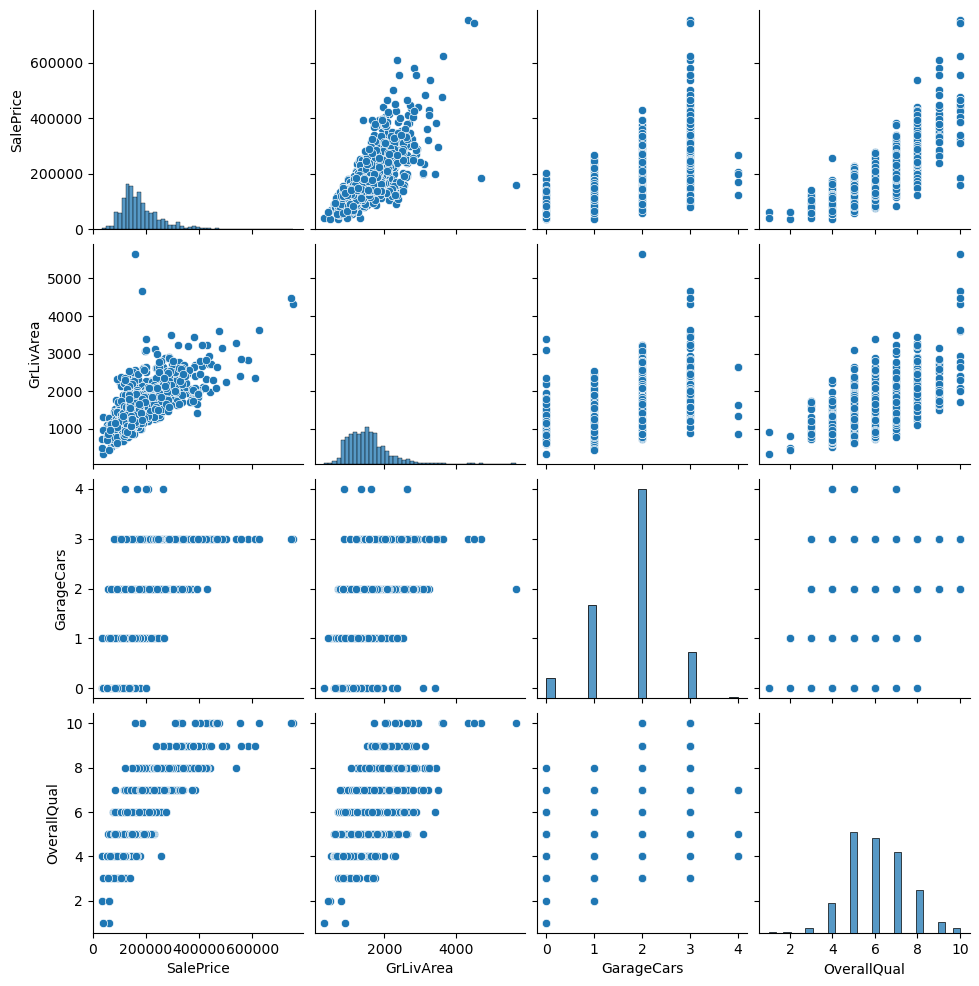

In [23]:
#multicollinearity using pairplots
sns.pairplot(df, vars=['SalePrice','GrLivArea', 'GarageCars', 'OverallQual'])
plt.show()

In [24]:
vars2 = ['SalePrice','GrLivArea', 'GarageCars', 'OverallQual']
df1 = df[vars2]

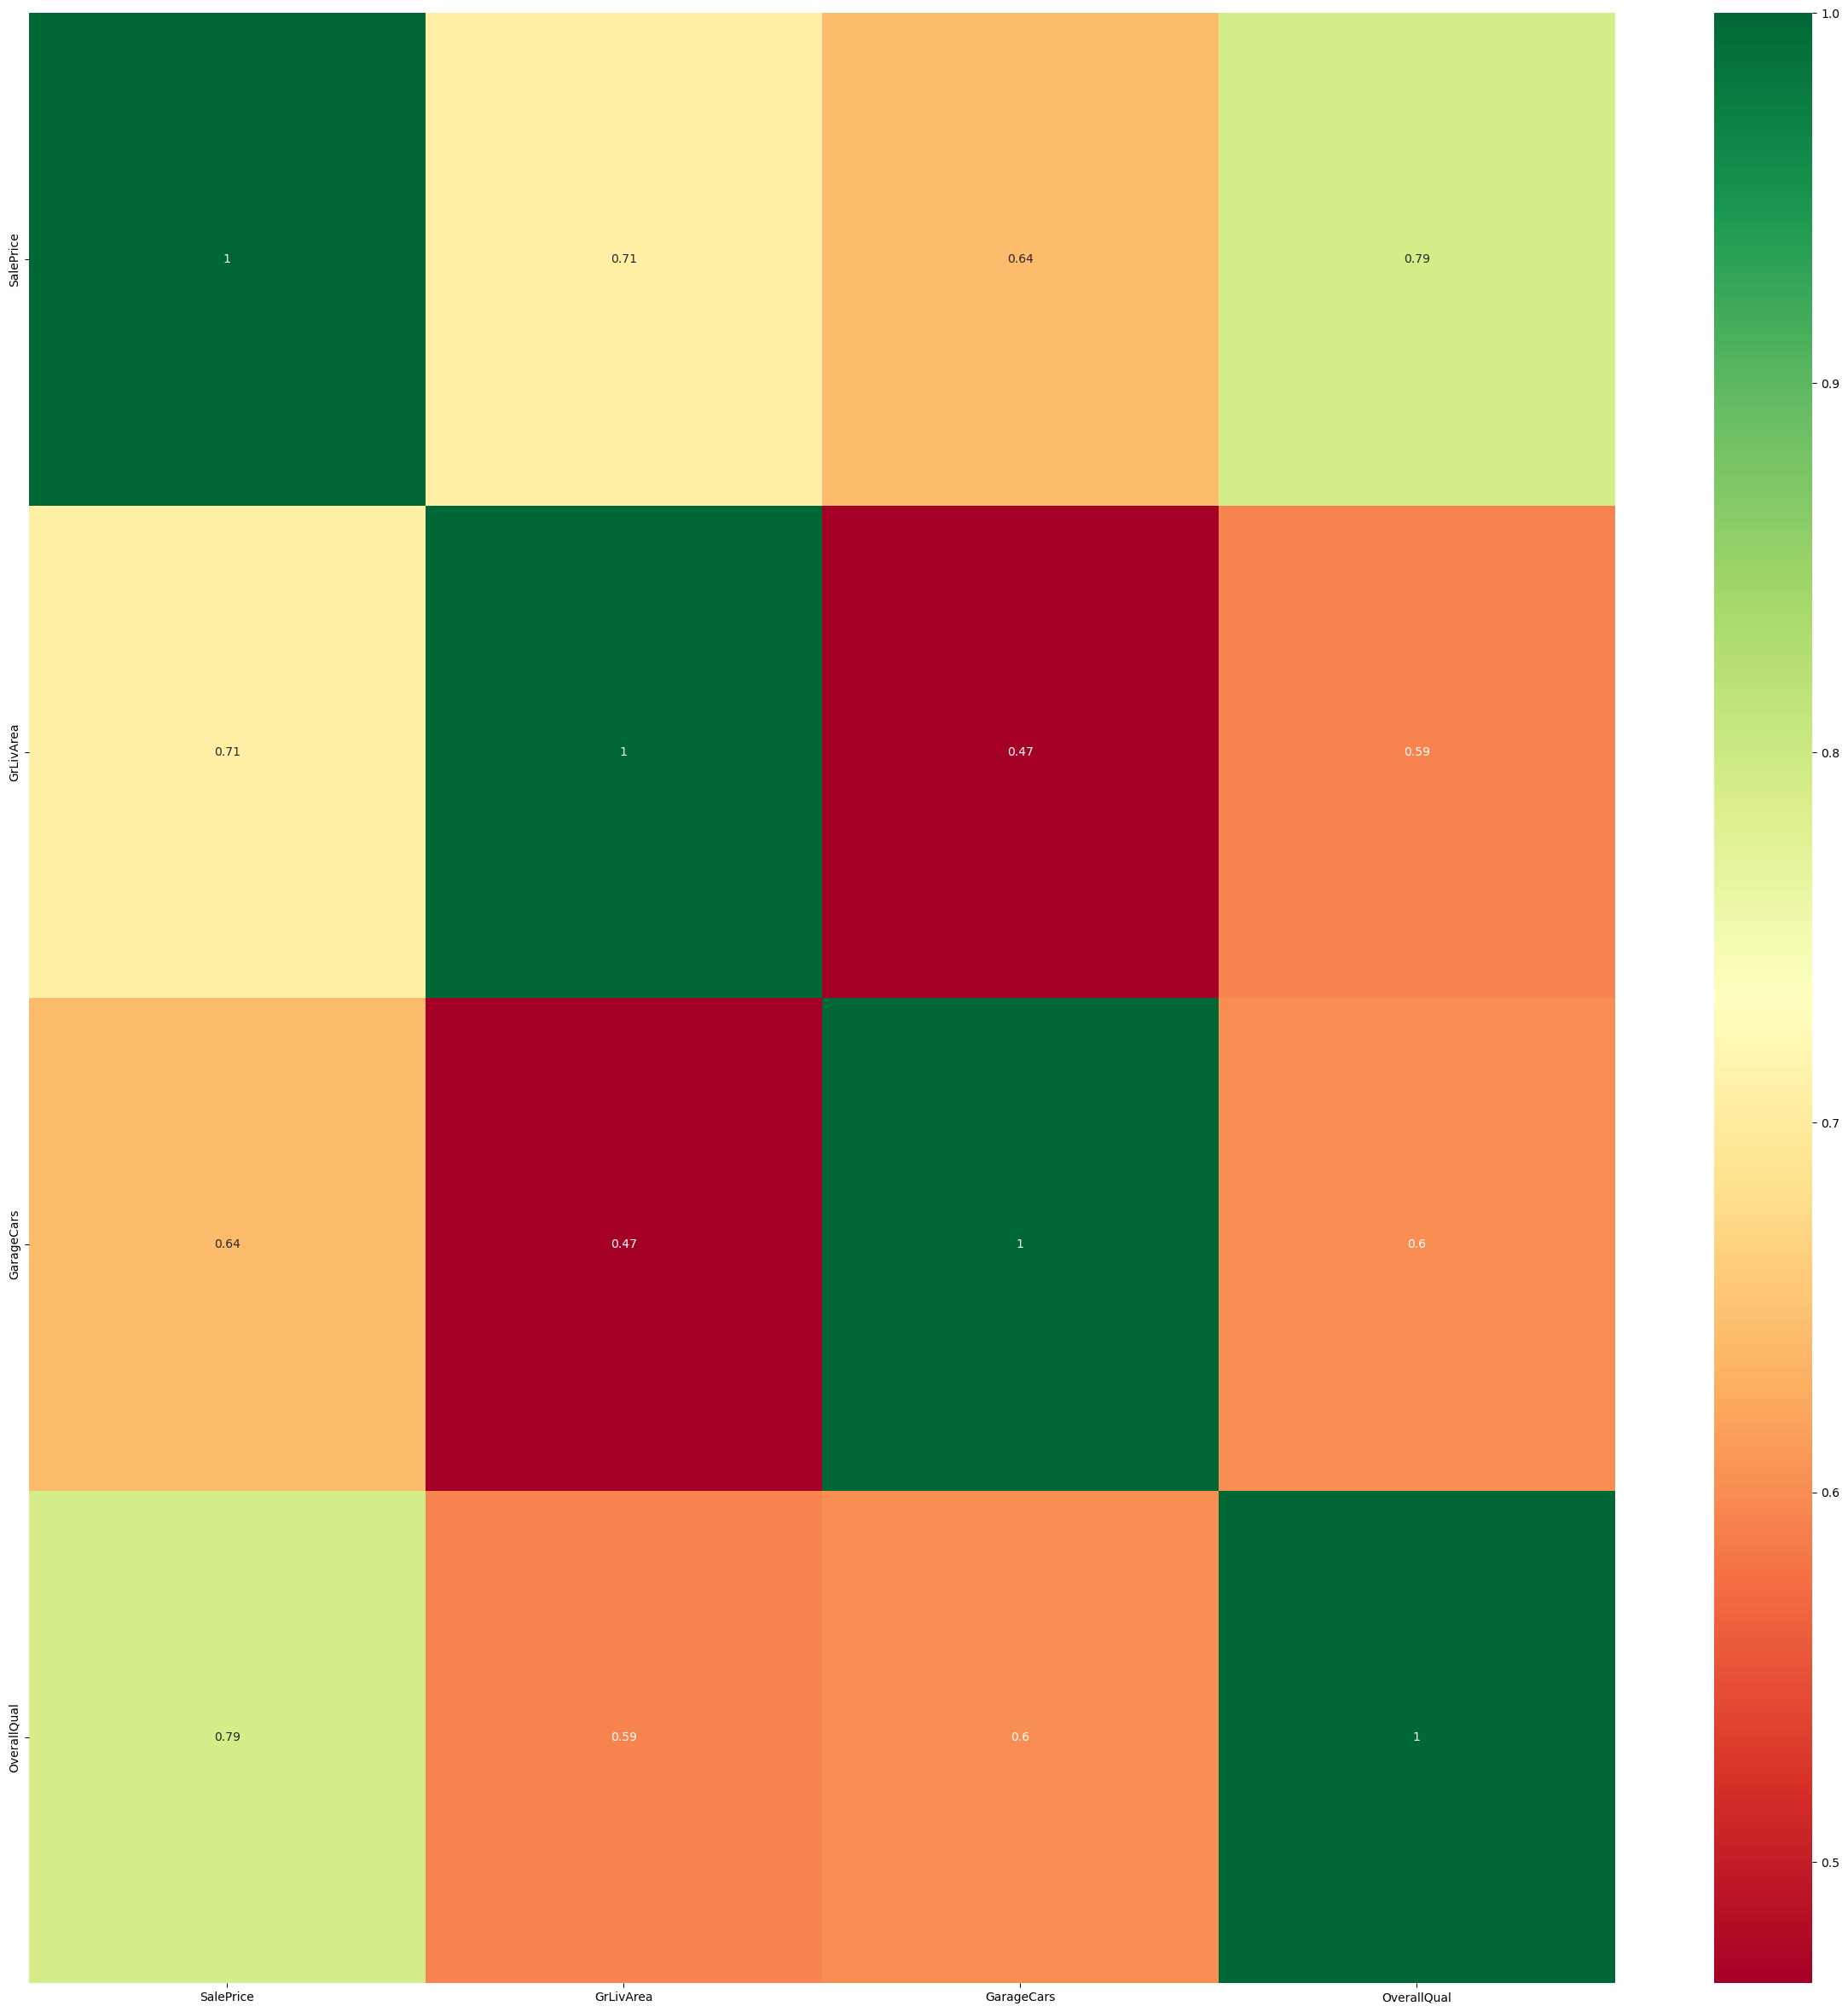

In [25]:
plt.figure(figsize=(30, 30))
sns.heatmap(df1.corr(), cmap='RdYlGn', annot=True)
plt.show()